In [2]:
import math, pylab
import numpy as np
import pandas as pd
import scipy.stats as stats
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as pdr

# Statistical experiments and significance testing

Design of experiments is a cornerstone of statistics

Experiments confirm or reject a hypothesis

Data scientists conduct experiments around user interface and product marketing

*Inference* is applying experiment results based on a sample to the broader population

Classical statistical inference "pipeline"

*Formulate hypothesis -> Design experiment -> Collect data -> Inference/conclusions*

---

## A/B testing

- **Treatment** - something to which a subject is exposed (drug, price, web layout, etc.)

- **Treatment group** - group of subjects exposed to specific treatment

- **Control group** - group of subjects exposed to no treatment or standard treatment

- **Randomization** - process of randomly assigning subjects to treatments

- **Subjects** - item/people that are exposed to treatments (web users, drug users, etc.)

- **Test statistic** - metric used to measure the effect of the treatment

A/B tests are common in web design and marketing

E.g. testing two web layouts to see what produces more clicks or conversions

Most common test statistic in A/B testing is a binary variable: click or no click, buy or no buy, drug worked or drug didn't work.

A continuous variable as the test statistic would have metrics like mean and standard deviation.

### Why have a control group?

Why not just roll out a change to all users, and compare against past experience?

Other factors might affect the outcome.

*Blind study* is when subjects don't know if they are getting treatment A or treament B

*Double blind study* is when subjects don't know, AND researchers don't know which subjects get which treatment

In web context, treatments include design, price, wording, etc.

In web context, measuring clicks, purchases, visit duration, number of pages visiited, whether a particular page is visited, etc.

Best to choose the test statistic before the experiment, to avoid researcher bias.

### Why just A/B? Why not C, D... ?

A/B tests are popular but not the only type of experiment

*Multi-arm bandit algorithm* is used to look at multiple options

- subjects are assigned to 2 (or more) groups that are treated exactly alike, except for the treatment

- ideally, subjects are assigned randomly to the groups

---

## Hypothesis tests

- **Null hypothesis** - hypothesis that chance is to blame

- **Alternative hypothesis** - counterpoint to the null - what you hope to prove

- **One-way test** - hypothesis test that counts chance results only in one direction

- **Two-way test** - counts chance results in 2 directions

Also called *significance tests*

"Is random chance responsible for an observed effect?"

Make sure you're not being fooled by random chance.

In a proper A/B test, you want to structure it so any difference on A treatment and B treatment is due to either random chance of how subjects were assigned to groups, or a true difference between A and B.

A statistical hypothesis test is a further analysis, assessing whether random chance could be a reasonable explanation.

### Null hypothesis

Baseline assumption is that treatments are equal, and the difference is due to chance.

We then hope to prove this null hypothesis *wrong*, and so prove that there is a true difference between A and B.

One way to do this is a resampling permutation procedure, shuffling together results and resampling repeatedly, seeing how often we see a difference as extreme as the observed difference.

### Alternative hypothesis

The alternative to the null - "A works better than B", etc.

Taken together, the null and the alternative hypotheses must cover all possibilities

### One-way, Two-way hypothesis tests

If you consider one option the default, you don't care so much about random chance in that direction, because you'd already be sticking with the default.

So you want a *directional* alternative hypothesis (e.g. B is better than A) and a *one-way* test. This means extreme chance results in only one direction count toward the p-value.

If you want to track chance in either direction, it's *bidirectional* (e.g. A is different than B, could be bigger or smaller)

This case use a *two-way* test, where extreme values in either direction count toward p-value.

- null hypothesis is a notion that nothing special has happened, and any effect is due to random chance
- hypothesis test assumes that null hypothesis is true, creates a null probability model, and tests whether the effect you observe is a reasonable outcome of that model

---

## Resampling

- **Permutation test** - combining 2 or more samples together, randomly reallocating observations to samples

- **With or without replacement** - whether or not item selected is returned before the next sample draw

Repeatedly sampling values from observed data

Goal: assessing random variability in a statistic

Two types of resampling: *bootstrap* and *permutation* tests

Bootstrap assesses reliability of an estimate

Permutation tests are used to test hypotheses, usually w/ 2 or more groups

### Permutation test

*Random permutation test*

First step of a permutation test is combining two or more groups together

Then draw randomly from combined set and see how they differ

- combine results (group A, group B, etc.) into a single dataset
- shuffle, then sample w/o replacement a resample of size of group A
- from remaining data, sample w/o replacement a resample of size of group B
- so on for C, D, etc.
- whatever statistic or estimate calculated for original samples, calculate for the resamples
- repeat previous step R times to yield a permutation distribution of the test statistic

Now go back to the observed difference between groups and compare it to the set of permutted differences

If the observed difference lies outside most of the permutation distribution, the difference is *statistically significant*

Observed mean diff -0.946


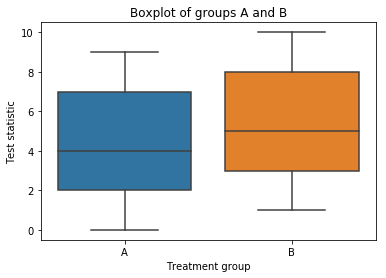

In [111]:
# creating some statistically significant data
group_a = np.random.randint(0,10, size=1000)
group_b = np.random.randint(1,11, size=1000)
mean_dif = group_a.mean() - group_b.mean()

print('Observed mean diff', mean_dif)

# plot with seaborn
ax = sns.boxplot(x=['A', 'B'], y=[group_a, group_b])
plt.title('Boxplot of groups A and B')
plt.xlabel('Treatment group')
plt.ylabel('Test statistic')
plt.show()

Mean: -0.4724284
SD: 0.0637917100683


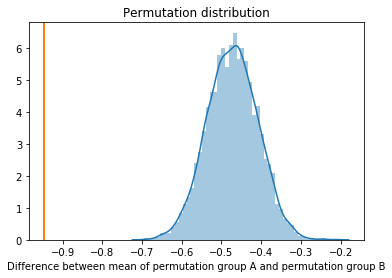

In [112]:
group_a_b = np.concatenate((group_a,group_b))
permutation_means = []

for _ in range(10000):
    np.random.shuffle(group_a_b)
    group_a_i = group_a_b[:1000]
    group_a = group_a_b[1000:]
    mean_dif_i = group_a.mean() - group_b.mean()
    permutation_means.append(mean_dif_i)

print('Mean:', np.mean(permutation_means))
print('SD:', np.std(permutation_means))
    
# plot with seaborn
ax = sns.distplot(permutation_means)
plt.title('Permutation distribution')
plt.xlabel('Difference between mean of permutation group A and permutation group B')
plt.plot([mean_dif, mean_dif],[0,8], linewidth=2)
plt.show()

The observed statistic (difference between mean of group A and mean of group B) is in fact outside most of the permutation distribution.

This means our observed difference is *statistically significant*.

### Exhaustive and bootstrap permutation test

*Exhaustive*, or *exact* permuation tests checks every possible permutation

Only possible with smaller sample sizes

*Bootstrap* permutation test is sampling *with replacement*

This way we model not just the random element of assigning treatment to subject, but also the random element of selecting subjects from the population.

### Permutation tests: bottom line for data science

A useful heuristic procedure for exploring role of random variation

"One size fits all" approach to inference - can accomodate different sample sizes, data types, etc.

- permutation test combines multiple samples and shuffles
- shuffled values are then divided into resamples, and statistic is calculated
- process is repeated, and resampled statistic is tabulated
- comparing the observed value of the statistic to the resampled distribution allows you to to judge whether an observed difference between samples might occur by chance

---

## Statistical significance and P-values

- **P-value** - given a chance model that embodies the null hypothesis, the p-value is the probability of obtaining results as unusual or extreme as the observed results

- **Alpha** - probability threshold of "unusualness" that chance results must surpass, for actual outcomes to be deemed statistically significant

- **Type 1 error** - mistakenly concluding an effect is real, when it's actually due to chance

- **Type 2 error** - mistakenly concluding an effect is due to chance, when it's actually real

*Statistical significance* is how you measure whether an experiment yields a result more extreme than what chance might produce.

In [115]:
web_test_results = pd.DataFrame({'Price A':[200,23539],'Price B':[182,22406]}, index=['Conversion','No conversion'])

web_test_results

,Price A,Price B
Conversion,200,182
No conversion,23539,22406


In [152]:
conversion_rate = web_test_results.loc['Conversion',] / (web_test_results.loc['No conversion',] + web_test_results.loc['Conversion',])

print(conversion_rate)

observed_difference = (conversion_rate['Price A'] - conversion_rate['Price B'])

print('Conversion rate difference:',observed_difference)

Price A    0.008425
Price B    0.008057
dtype: float64
Conversion rate difference: 0.000367579118206


"If the 2 prices share the same conversion rate, could chance produce a difference like this?"

- combine samples and shuffle
- select new sample of size of group A, and of group B
- record the statistic for each group, and the difference between groups
- repeat R times
- note how often the difference was above/below a certain threshhold

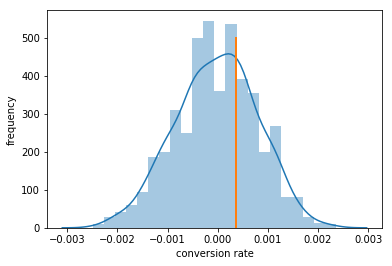

In [155]:
num_ones = web_test_results.loc['Conversion',].sum()
num_zeros = web_test_results.loc['No conversion',].sum()
a_size = web_test_results['Price A'].sum()
b_size = web_test_results['Price B'].sum()

all_data = [1] * num_ones + [0] * num_zeros
diffs = []

def proportion(x):
    return sum(x) / len(x)

for _ in range(1000):
    np.random.shuffle(all_data)
    diffs.append(proportion(all_data[:a_size]) - proportion(all_data[a_size:]))
    
# plot with seaborn
ax = sns.distplot(diffs)
plt.xlabel('conversion rate')
plt.ylabel('frequency')
plt.plot([observed_difference, observed_difference],[0,500], linewidth=2)
plt.show()

We see that the observed difference is well within the range of chance variation.

### P-value

Lorem

In [167]:
z_score = (observed_difference - np.mean(diffs)) / np.std(diffs)

# if we assume the data is normally distributed
p_value = 1 - stats.norm.cdf(z_score)

print('P-value', p_value)

P-value 0.31553554751
